#shuffling data

In [ ]:
import pandas as pd

# Read the original Excel file
data = pd.read_excel("/content/hemo_data_before_shuffle.xlsx")

# Shuffle the DataFrame with reproducibility
shuffled_df = data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Original DataFrame:")
print(data)

print("\nShuffled DataFrame:")
print(shuffled_df)

# Save the shuffled DataFrame to a new Excel file
shuffle_output_file = "/content/hemo_data.xlsx"
shuffled_df.to_excel(shuffle_output_file, index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/hemo_data_before_shuffle.xlsx'

#correlation for AAC

In [ ]:
# Step 1: Install dependencies if needed (optional in Colab)
!pip install pandas openpyxl seaborn matplotlib

# Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 4: Load Excel file
import pandas as pd

# Replace with your uploaded file name if different
df = pd.read_excel("hemo_data_with_AAC.xlsx")

# Step 5: Identify amino acid columns
exclude_cols = ["ID", "seq", "μM", "label", "length"]
aa_cols = [col for col in df.columns if col not in exclude_cols]

# Step 6: Compute correlation of each amino acid with the label
corr_with_label = df[aa_cols + ['label']].corr()['label'].drop('label')
corr_with_label_sorted = corr_with_label.sort_values(key=abs, ascending=False)

# Step 7: Display result
print("Correlation between amino acid composition and hemolytic label (sorted by absolute value):\n")
print(corr_with_label_sorted)


Correlation between amino acid composition and hemolytic label (sorted by absolute value):

AAC_K   -0.236707
AAC_C    0.163297
AAC_E    0.162766
AAC_G    0.162069
AAC_Y    0.128416
AAC_D    0.080209
AAC_F    0.063068
AAC_M   -0.056073
AAC_V   -0.051803
AAC_S    0.046567
AAC_N   -0.042992
AAC_H   -0.037859
AAC_A   -0.031273
AAC_W   -0.027206
AAC_T    0.022315
AAC_I    0.020403
AAC_R    0.016149
AAC_P    0.013972
AAC_Q    0.013494
AAC_L    0.000084
Name: label, dtype: float64


In [ ]:
import pandas as pd
import scipy.stats as stats

# 1. Load data
file_path = '/content/hemo_data_with_AAC.xlsx'  # Update as needed
df = pd.read_excel(file_path)

# 2. Define amino acid composition columns
exclude_cols = ["ID", "seq", "μM", "label", "length"]
aa_cols = [col for col in df.columns if col not in exclude_cols]

# (Optional: Clean amino acid column names by removing 'AAC_' prefix)
clean_aa_cols = [col.replace('AAC_', '') if col.startswith('AAC_') else col for col in aa_cols]
# Note: This does not rename columns in df, only for display/export. To rename in df, use:
df = df.rename(columns={old: new for old, new in zip(aa_cols, clean_aa_cols)})
aa_cols = clean_aa_cols  # Now use clean names for analysis

# 3. Split data into hemolytic and non-hemolytic
df_hemo = df[df['label'] == 1]
df_nonhemo = df[df['label'] == 0]

# 4. Compute mean AAC (%) for each group
mean_hemo = df_hemo[aa_cols].mean()
mean_nonhemo = df_nonhemo[aa_cols].mean()

# 5. Compute difference in AAC
diff = mean_hemo - mean_nonhemo

# 6. Perform t-test for each amino acid
p_vals = {}
for aa in aa_cols:
    _, p = stats.ttest_ind(df_hemo[aa], df_nonhemo[aa], equal_var=False)
    p_vals[aa] = p

# 7. Compile results into a DataFrame
results = pd.DataFrame({
    'mean_hemo_%': mean_hemo,
    'mean_nonhemo_%': mean_nonhemo,
    'difference_%': diff,
    'p_value': pd.Series(p_vals)
})

# 8. Sort by absolute difference in AAC (most meaningful)
results_sorted = results.reindex(results['difference_%'].abs().sort_values(ascending=False).index)

# 9. Display with precision and as markdown table for quick review
pd.set_option('display.precision', 3)
print("Amino acid composition differences between hemolytic vs non-hemolytic:")
print(results_sorted.round(3).to_markdown())

# 10. Save to Excel
results_sorted.round(3).to_excel('AAC_results_sorted.xlsx', index=True)
print("\nResults saved to 'AAC_results_sorted.xlsx'")


Amino acid composition differences between hemolytic vs non-hemolytic:
|    |   mean_hemo_% |   mean_nonhemo_% |   difference_% |   p_value |
|:---|--------------:|-----------------:|---------------:|----------:|
| K  |        14.601 |           20.759 |         -6.158 |     0     |
| G  |         9.183 |            6.881 |          2.302 |     0     |
| C  |         3.179 |            1.341 |          1.838 |     0     |
| E  |         2.021 |            0.9   |          1.121 |     0     |
| F  |         6.022 |            5.163 |          0.859 |     0.002 |
| Y  |         1.784 |            0.943 |          0.841 |     0     |
| V  |         4.64  |            5.298 |         -0.657 |     0.009 |
| A  |         7.366 |            7.92  |         -0.554 |     0.115 |
| W  |         4.969 |            5.492 |         -0.523 |     0.17  |
| S  |         3.642 |            3.189 |          0.454 |     0.018 |
| R  |         7.901 |            7.505 |          0.396 |     0.416 |
| D  |

Available columns: ['ID', 'seq', 'μM', 'label', 'length', 'AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I', 'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S', 'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y']

Top 10 correlated AAs (entire dataset):
 AAC_K   -0.236707
AAC_C    0.163297
AAC_E    0.162766
AAC_G    0.162069
AAC_Y    0.128416
AAC_D    0.080209
AAC_F    0.063068
AAC_M   -0.056073
AAC_V   -0.051803
AAC_S    0.046567
Name: label, dtype: float64

Top 10 amino acids with greatest correlation difference between hemolytic and non-hemolytic:

AAC_L   -0.044178
AAC_Y    0.029992
AAC_S   -0.027188
AAC_G    0.020979
AAC_M    0.019526
AAC_I    0.018310
AAC_Q    0.017910
AAC_R    0.016016
AAC_A   -0.014435
AAC_V   -0.013941
dtype: float64


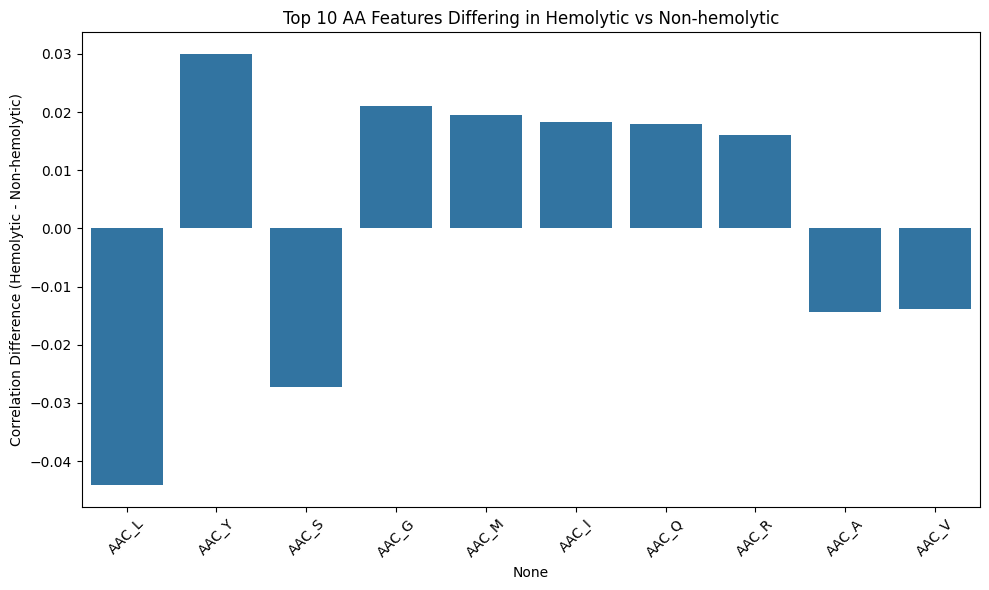

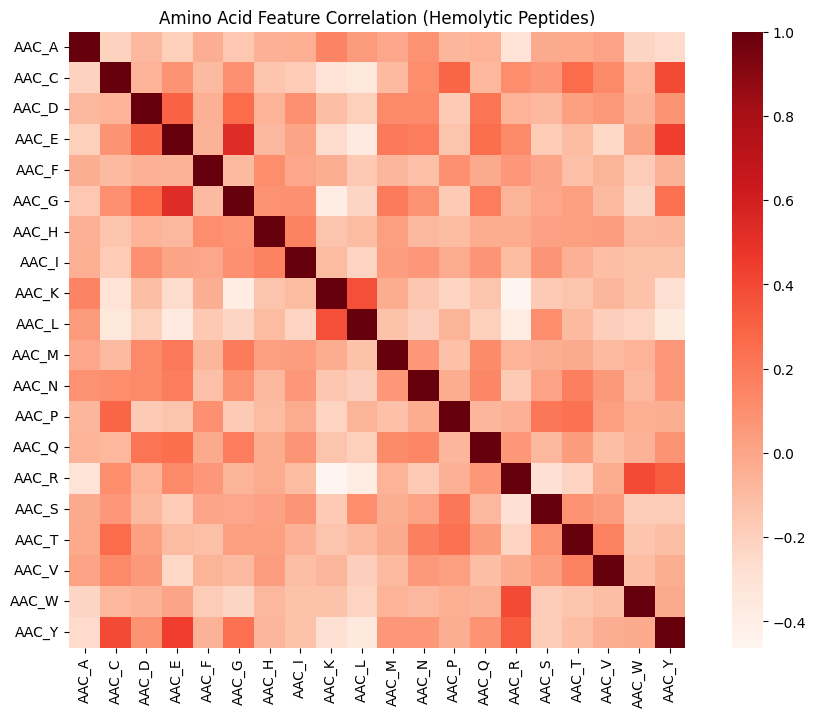

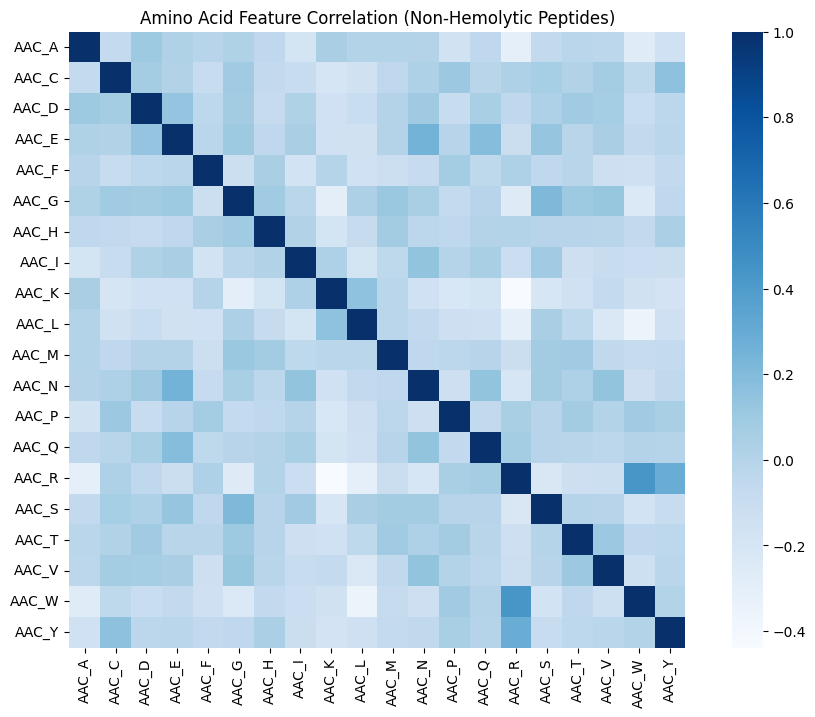

In [ ]:


# Step 4: Load Excel file
df = pd.read_excel("hemo_data_with_AAC.xlsx")  # Adjust file name if needed

# Step 5: Check and define amino acid columns
print("Available columns:", df.columns.tolist())
exclude_cols = ["ID", "seq", "μM", "label", "length"]
aa_cols = [col for col in df.columns if col not in exclude_cols]

# Step 6: Correlation with label (entire dataset)
corr_all = df[aa_cols + ['label']].corr()['label'].drop('label').sort_values(key=abs, ascending=False)
print("\nTop 10 correlated AAs (entire dataset):\n", corr_all.head(10))

# Step 7: Subsets
df_hemo = df[df['label'] == 1]
df_nonhemo = df[df['label'] == 0]

# Step 8: Correlation among amino acid features for both subsets
corr_hemo = df_hemo[aa_cols].corr()
corr_nonhemo = df_nonhemo[aa_cols].corr()

# Step 9: Mean correlation of amino acids with all others (can change logic)
hemo_corr_mean = corr_hemo.mean().sort_values(ascending=False)
nonhemo_corr_mean = corr_nonhemo.mean().sort_values(ascending=False)

# Step 10: Compare correlation between hemolytic and non-hemolytic
corr_diff = hemo_corr_mean - nonhemo_corr_mean
corr_diff_sorted = corr_diff.sort_values(key=abs, ascending=False)

print("\nTop 10 amino acids with greatest correlation difference between hemolytic and non-hemolytic:\n")
print(corr_diff_sorted.head(10))

# Step 11: Plotting correlation difference
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_diff_sorted.head(10).index, y=corr_diff_sorted.head(10).values)
plt.xticks(rotation=45)
plt.ylabel("Correlation Difference (Hemolytic - Non-hemolytic)")
plt.title("Top 10 AA Features Differing in Hemolytic vs Non-hemolytic")
plt.tight_layout()
plt.show()

# Step 12: (Optional) Heatmap of correlation matrices
plt.figure(figsize=(12, 8))
sns.heatmap(corr_hemo, cmap='Reds', square=True)
plt.title("Amino Acid Feature Correlation (Hemolytic Peptides)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_nonhemo, cmap='Blues', square=True)
plt.title("Amino Acid Feature Correlation (Non-Hemolytic Peptides)")
plt.show()


#pychochemical properties

In [ ]:
# Step 1: Install required libraries
!pip install biopython openpyxl pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.3 MB/s eta 0:00:00


In [ ]:

# Step 2: Import libraries
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
# Step 3: Read the manually uploaded Excel file
df = pd.read_excel("/content/hemo_data.xlsx")  # Make sure this file is uploaded

# Step 4: Define the function to compute properties
def compute_properties(seq):
    try:
        analysis = ProteinAnalysis(seq)
        mw = analysis.molecular_weight()
        pI = analysis.isoelectric_point()
        instability = analysis.instability_index()
        gravy = analysis.gravy()
        ext_coeff = analysis.molar_extinction_coefficient()[0]  # assuming reduced cysteines
        return pd.Series([mw, pI, instability, gravy, ext_coeff])
    except Exception as e:
        print(f"Error with sequence '{seq}': {e}")
        return pd.Series([None] * 5)

# Step 5: Apply the function to 'seq' column
df[['MolWeight', 'pI', 'InstabilityIndex', 'GRAVY', 'ExtCoeff']] = df['seq'].apply(compute_properties)

# Step 6: Save results to a new file named with properties
output_file = "/content/hemo_data_with_properties.xlsx"
df.to_excel(output_file, index=False)

#pfeature_standalone

In [ ]:
# Download the standalone zip
!wget https://github.com/raghavagps/Pfeature/raw/master/Standalone/pfeature_standalone.zip

# Unzip it
!unzip pfeature_standalone.zip

# Change directory
%cd pfeature_standalone

# Check what scripts are available
!ls


--2025-06-11 10:57:15--  https://github.com/raghavagps/Pfeature/raw/master/Standalone/pfeature_standalone.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/Standalone/pfeature_standalone.zip [following]
--2025-06-11 10:57:15--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/Standalone/pfeature_standalone.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335724 (328K) [application/zip]
Saving to: ‘pfeature_standalone.zip’

pfeature_standalone 100%[===================>] 327.86K  --.-KB/s    in 0.02s   

2025-06-11 10:57:16 (16.7 MB/s) - ‘pfeature_standa

In [ ]:
#AAC Amino acid composition
!python pfeature_comp.py -j AAC -i /content/hemo_data.fasta -o /content/pfeature_AAC_result.csv


Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: AAC ; Output File: /content/pfeature_AAC_result.csv


In [ ]:
#DPC: Dipeptide composition
!python pfeature_comp.py -j DPC -i /content/hemo_data.fasta -o /content/pfeature_DPC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: DPC ; Output File: /content/pfeature_DPC_result.csv


In [ ]:
#TPC: Tripeptide composition
!python pfeature_comp.py -j TPC -i /content/hemo_data.fasta -o /content/pfeature_TPC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: TPC ; Output File: /content/pfeature_TPC_result.csv


In [ ]:
#ATC: Atomic composition
!python pfeature_comp.py -j ATC -i /content/hemo_data.fasta -o /content/pfeature_ATC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: ATC ; Output File: /content/pfeature_ATC_result.csv


In [ ]:
#RRI: Residue repeat information
!python pfeature_comp.py -j RRI -i /content/hemo_data.fasta -o /content/pfeature_RRI_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: RRI ; Output File: /content/pfeature_RRI_result.csv


In [ ]:
#DDR: Distance distribution of residues
!python pfeature_comp.py -j DDR -i /content/hemo_data.fasta -o /content/pfeature_DDR_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: DDR ; Output File: /content/pfeature_DDR_result.csv


In [ ]:
#PCP: Physico-chemical properties composition
!python pfeature_comp.py -j PCP -i /content/hemo_data.fasta -o /content/pfeature_PCP_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: PCP ; Output File: /content/pfeature_PCP_result.csv


In [ ]:
# Run Bond composition (BTC) descriptor and save output to CSV
!python pfeature_comp.py -j BTC -i /content/hemo_data.fasta -o /content/pfeature_BTC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: BTC ; Output File: /content/pfeature_BTC_result.csv


In [ ]:
# Run Distance distribution of residues (DDR)
!python pfeature_comp.py -j DDR -i /content/hemo_data.fasta -o /content/pfeature_DDR_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: DDR ; Output File: /content/pfeature_DDR_result.csv


In [ ]:
# Run Shannon entropy of protein (SEP)
!python pfeature_comp.py -j SEP -i /content/hemo_data.fasta -o /content/pfeature_SEP_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: SEP ; Output File: /content/pfeature_SEP_result.csv


In [ ]:
# Run Shannon entropy of residues (SER)
!python pfeature_comp.py -j SER -i /content/hemo_data.fasta -o /content/pfeature_SER_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: SER ; Output File: /content/pfeature_SER_result.csv


In [ ]:
# Run Shannon entropy of physico-chemical properties (SPC)
!python pfeature_comp.py -j SPC -i /content/hemo_data.fasta -o /content/pfeature_SPC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: SPC ; Output File: /content/pfeature_SPC_result.csv


In [ ]:
# Run Conjoint triad descriptors (CTC)
!python pfeature_comp.py -j CTC -i /content/hemo_data.fasta -o /content/pfeature_CTC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: CTC ; Output File: /content/pfeature_CTC_result.csv


In [ ]:
# Run Pseudo amino acid composition (PAAC)
!python pfeature_comp.py -j PAAC -i /content/hemo_data.fasta -o /content/pfeature_PAAC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: PAAC ; Output File: /content/pfeature_PAAC_result.csv
Order of Gap: 1  ;Value of weight: 0.05 



In [ ]:
# Run Amphiphilic pseudo amino acid composition (APAAC)
!python pfeature_comp.py -j APAAC -i /content/hemo_data.fasta -o /content/pfeature_APAAC_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: APAAC ; Output File: /content/pfeature_APAAC_result.csv
Order of Gap: 1  ;Value of weight: 0.05 



In [ ]:
# Run Quasi sequence order (QSO)
!python pfeature_comp.py -j QSO -i /content/hemo_data.fasta -o /content/pfeature_QSO_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: QSO ; Output File: /content/pfeature_QSO_result.csv
Order of Gap: 1  ;Value of weight: 0.1 



In [ ]:
# Run Sequence order coupling number (SOC)
!python pfeature_comp.py -j SOC -i /content/hemo_data.fasta -o /content/pfeature_SOC_result.csv


Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: SOC ; Output File: /content/pfeature_SOC_result.csv
Order of Gap: 1 



#program runnnnnnning toooo long or some error


In [ ]:
#allcomp
!python pfeature_comp.py -j ALLCOMP -i /content/hemo_data.fasta -o /content/pfeature_ALLCOMP_result.csv

Summary of Parameters:

Input File: /content/hemo_data.fasta ; Job: ALLCOMP ; Output File: /content/pfeature_ALLCOMP_result.csv


In [ ]:
# Run Amino-acid indices composition (AAI) takes time more than 3 hrs not completed###!!!!!!!!
!python pfeature_comp.py -j AAI -i /content/hemo_data.fasta -o /content/pfeature_AAI_result.csv

python3: can't open file '/content/pfeature_comp.py': [Errno 2] No such file or directory


In [ ]:
# Run Autocorrelation descriptors (ACR) takes time more than 2 hrs not completed###!!!!!!!!
!python pfeature_comp.py -j ACR -i /content/hemo_data.fasta -o /content/pfeature_ACR_result.csv

python3: can't open file '/content/pfeature_comp.py': [Errno 2] No such file or directory


In [ ]:
# Run Composition enhanced transition distribution (CeTD)                    #####ERROR#####
!python pfeature_comp.py -j CeTD -i /content/hemo_data.fasta -o /content/pfeature_CeTD_result.csv


python3: can't open file '/content/pfeature_comp.py': [Errno 2] No such file or directory


In [ ]:
# Run Physico-chemical properties repeat information (PRI) takes time more than 2 hrs not completed###!!!!!!!!
!python pfeature_comp.py -j PRI -i /content/hemo_data.fasta -o /content/pfeature_PRI_result.csv

python3: can't open file '/content/pfeature_comp.py': [Errno 2] No such file or directory


#merge_feature

In [ ]:
import pandas as pd

# Step 1: Load the main Excel file
df_main = pd.read_excel("/content/hemo_data.xlsx")

# Step 2: Load the pfeature feature files (order assumed to match df_main)
aac   = pd.read_csv("/content/pfeature_AAC_result.csv")    # Amino acid composition
dpc   = pd.read_csv("/content/pfeature_DPC_result.csv")    # Dipeptide composition
tpc   = pd.read_csv("/content/pfeature_TPC_result.csv")    # Tripeptide composition
atc   = pd.read_csv("/content/pfeature_ATC_result.csv")    # Atomic composition
btc   = pd.read_csv("/content/pfeature_BTC_result.csv")    # Bond composition
pcp   = pd.read_csv("/content/pfeature_PCP_result.csv")    # Physico-chemical properties composition
rri   = pd.read_csv("/content/pfeature_RRI_result.csv")    # Residue repeat information
ddr   = pd.read_csv("/content/pfeature_DDR_result.csv")    # Distance distribution of residues
sep   = pd.read_csv("/content/pfeature_SEP_result.csv")    # Shannon entropy of protein
ser   = pd.read_csv("/content/pfeature_SER_result.csv")    # Shannon entropy of residues
spc   = pd.read_csv("/content/pfeature_SPC_result.csv")    # Shannon entropy of physico-chemical properties
ctc   = pd.read_csv("/content/pfeature_CTC_result.csv")    # Conjoint triad descriptors
paac  = pd.read_csv("/content/pfeature_PAAC_result.csv")   # Pseudo amino acid composition
apaac = pd.read_csv("/content/pfeature_APAAC_result.csv")  # Amphiphilic pseudo amino acid composition
qso   = pd.read_csv("/content/pfeature_QSO_result.csv")    # Quasi sequence order
soc   = pd.read_csv("/content/pfeature_SOC_result.csv")    # Sequence order coupling number
#aai   = pd.read_csv("/content/pfeature_AAI_result.csv")    # Amino-acid indices composition
#cetd  = pd.read_csv("/content/pfeature_CeTD_result.csv")   # Composition enhanced transition distribution
#pri   = pd.read_csv("/content/pfeature_PRI_result.csv")    # Physico-chemical properties repeat information
#acr   = pd.read_csv("/content/pfeature_ACR_result.csv")    # Autocorrelation descriptors


# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([
    df_main,
    aac, dpc, tpc, atc, btc, pcp,
    rri, ddr, sep, ser, spc, ctc, paac, apaac, qso, soc
], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("hemo_data_complete.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_complete.xlsx'")


KeyboardInterrupt: 

In [ ]:
#hemo+AAC
import pandas as pd

# Step 1: Load the main Excel file
df_main = pd.read_excel("/content/hemo_data.xlsx")

# Step 2: Load the pfeature feature files (order assumed to match df_main)
aac   = pd.read_csv("/content/pfeature_AAC_result.csv")    # Amino acid composition

# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([df_main, aac], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("hemo_data_with_AAC.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_with_AAC.xlsx'")

Feature merging completed and saved as 'hemo_data_with_AAC.xlsx'


In [ ]:
#hemo+DPC

import pandas as pd

# Step 1: Load the main Excel file
df_main = pd.read_excel("/content/hemo_data.xlsx")

# Step 2: Load the pfeature feature files (order assumed to match df_main)
dpc   = pd.read_csv("/content/pfeature_DPC_result.csv")    # Amino acid composition

# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([df_main, dpc], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("hemo_data_with_DPC.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_with_DPC.xlsx'")

Feature merging completed and saved as 'hemo_data_with_DPC.xlsx'


In [ ]:
#hemo+PCP

import pandas as pd

# Step 1: Load the main Excel file
df_main = pd.read_excel("/content/hemo_data.xlsx")

# Step 2: Load the pfeature feature files (order assumed to match df_main)
pcp   = pd.read_csv("/content/pfeature_PCP_result.csv")    # Amino acid composition

# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([df_main, pcp], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("hemo_data_with_PCP.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_with_PCP.xlsx'")

Feature merging completed and saved as 'hemo_data_with_PCP.xlsx'


In [ ]:
#hemo+DDR

import pandas as pd

# Step 1: Load the main Excel file
df_main = pd.read_excel("/content/hemo_data.xlsx")

# Step 2: Load the pfeature feature files (order assumed to match df_main)
ddr   = pd.read_csv("/content/pfeature_DDR_result.csv")    # Amino acid composition

# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([df_main, ddr], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("hemo_data_with_DDR.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_with_DDR.xlsx'")

Feature merging completed and saved as 'hemo_data_with_DDR.xlsx'


In [ ]:
#hemo+AAC+DPC


df_main = pd.read_excel("/content/hemo_data.xlsx")


aac   = pd.read_csv("/content/pfeature_AAC_result.csv")
dpc   = pd.read_csv("/content/pfeature_DPC_result.csv")


# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([df_main, aac, dpc], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("hemo_data_with_AAC+DPC.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_with_AAC+DPC.xlsx'")



Feature merging completed and saved as 'hemo_data_with_AAC+DPC.xlsx'


In [ ]:
#hemo+AAC+DPC+PCP

df_main = pd.read_excel("/content/hemo_data.xlsx")


aac   = pd.read_csv("/content/pfeature_AAC_result.csv")
dpc   = pd.read_csv("/content/pfeature_DPC_result.csv")
pcp   = pd.read_csv("/content/pfeature_PCP_result.csv")


# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([df_main, aac, dpc, pcp], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("hemo_data_with_AAC+DPC+PCP.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_with_AAC+DPC+PCP.xlsx'")

Feature merging completed and saved as 'hemo_data_with_AAC+DPC+PCP.xlsx'


In [ ]:
#hemo+pfeature+protparma

import pandas as pd

# Step 1: Load the main Excel file
df_main = pd.read_excel("/content/hemo_data_with_properties.xlsx")

# Step 2: Load the pfeature feature files (order assumed to match df_main)
aac   = pd.read_csv("/content/pfeature_AAC_result.csv")    # Amino acid composition
dpc   = pd.read_csv("/content/pfeature_DPC_result.csv")    # Dipeptide composition
tpc   = pd.read_csv("/content/pfeature_TPC_result.csv")    # Tripeptide composition
atc   = pd.read_csv("/content/pfeature_ATC_result.csv")    # Atomic composition
btc   = pd.read_csv("/content/pfeature_BTC_result.csv")    # Bond composition
pcp   = pd.read_csv("/content/pfeature_PCP_result.csv")    # Physico-chemical properties composition
rri   = pd.read_csv("/content/pfeature_RRI_result.csv")    # Residue repeat information
ddr   = pd.read_csv("/content/pfeature_DDR_result.csv")    # Distance distribution of residues
sep   = pd.read_csv("/content/pfeature_SEP_result.csv")    # Shannon entropy of protein
ser   = pd.read_csv("/content/pfeature_SER_result.csv")    # Shannon entropy of residues
spc   = pd.read_csv("/content/pfeature_SPC_result.csv")    # Shannon entropy of physico-chemical properties
ctc   = pd.read_csv("/content/pfeature_CTC_result.csv")    # Conjoint triad descriptors
paac  = pd.read_csv("/content/pfeature_PAAC_result.csv")   # Pseudo amino acid composition
apaac = pd.read_csv("/content/pfeature_APAAC_result.csv")  # Amphiphilic pseudo amino acid composition
qso   = pd.read_csv("/content/pfeature_QSO_result.csv")    # Quasi sequence order
soc   = pd.read_csv("/content/pfeature_SOC_result.csv")    # Sequence order coupling number
#aai   = pd.read_csv("/content/pfeature_AAI_result.csv")    # Amino-acid indices composition
#cetd  = pd.read_csv("/content/pfeature_CeTD_result.csv")   # Composition enhanced transition distribution
#pri   = pd.read_csv("/content/pfeature_PRI_result.csv")    # Physico-chemical properties repeat information
#acr   = pd.read_csv("/content/pfeature_ACR_result.csv")    # Autocorrelation descriptors


# Step 3: Concatenate all dataframes along columns (axis=1)
df_merged = pd.concat([
    df_main,
    aac, dpc, tpc, atc, btc, pcp,
    rri, ddr, sep, ser, spc, ctc, paac, apaac, qso, soc
], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged.to_excel("/content/hemo_data_complete.xlsx", index=False)

print("Feature merging completed and saved as 'hemo_data_complete.xlsx'")

Feature merging completed and saved as 'hemo_data_complete.xlsx'


In [ ]:
!pip install dmslogo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.9 MB/s eta 0:00:00
  Created wheel for dmslogo: filename=dmslogo-0.7.0-py3-none-any.whl size=324266 sha256=911016362199b302ce2e495836bdf0e6318505f22b426b4167a1a1ed3aface4b
  Stored in directory: /root/.cache/pip/wheels/b9/a5/08/bd1a6cddbfcd91d16e5046edb661f4f266f905b3a73158a4a8
Successfully built dmslogo


In [ ]:
import pandas as pd

# Step 1: Load the main Excel file
df_main = pd.read_excel("/content/hemo_data.xlsx")

# Step 2: Load only the top 5 ranked pfeature groups

dpc   = pd.read_csv("/content/pfeature_DPC_result.csv")    # Rank 3
btc   = pd.read_csv("/content/pfeature_BTC_result.csv")    # Rank 4
pcp   = pd.read_csv("/content/pfeature_PCP_result.csv")    # Rank 1
ddr   = pd.read_csv("/content/pfeature_DDR_result.csv")    # Rank 2
ctc   = pd.read_csv("/content/pfeature_CTC_result.csv")    # Rank 5


# Step 3: Concatenate selected dataframes along columns (axis=1)
df_merged_top10 = pd.concat([
    df_main,
    pcp, ddr, dpc, btc, ctc], axis=1)

# Step 4: Save the final merged dataframe to Excel
df_merged_top10.to_excel("/content/hemo_data_top5features.xlsx", index=False)

print("Top 10 SHAP-ranked features merged and saved as 'hemo_data_top5features.xlsx'")


Top 10 SHAP-ranked features merged and saved as 'hemo_data_top5features.xlsx'
